In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #محتاج أقسم البيانات 
from sklearn.preprocessing import StandardScaler # scaling محتاج اعمل 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt # visualization

data = pd.read_csv(r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\processed_clean.csv")

In [6]:
X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for all Component:")
print(explained_variance)


Explained Variance Ratio for all Component:
[0.2459193  0.12255207 0.10055118 0.0877544  0.07372672 0.07014065
 0.06215425 0.05599888 0.05155779 0.042923   0.03277473 0.03039509
 0.02355195]


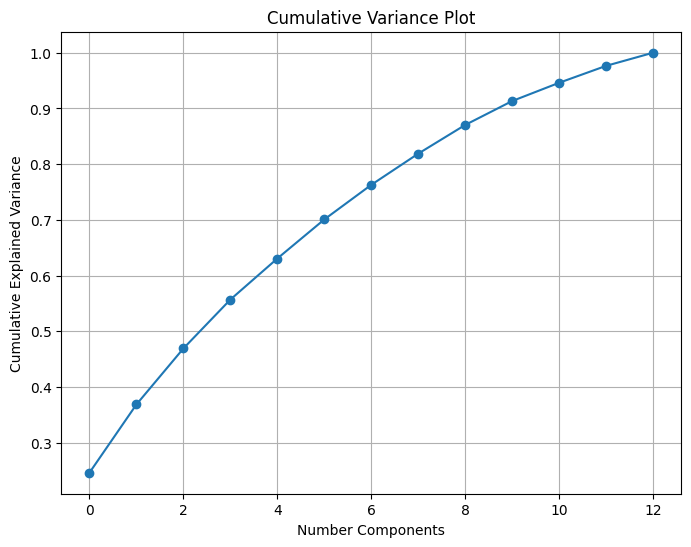

The number of components that cover 95% of the variance: 12


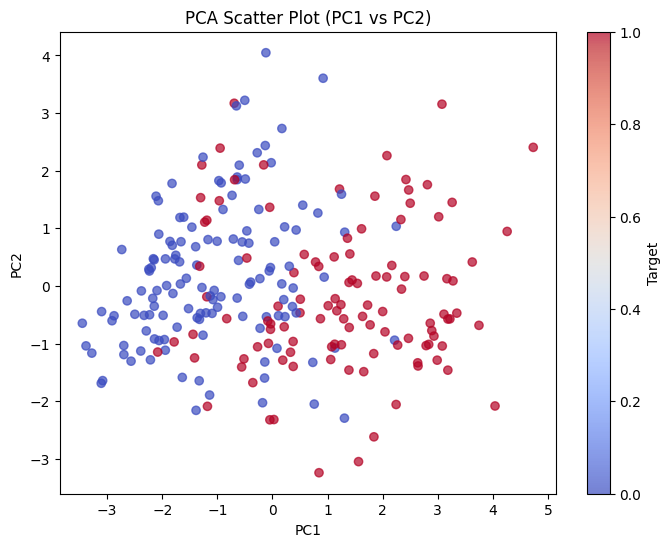

In [7]:

# 8- رسم الـ cumulative variance plot
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Plot")
plt.grid(True)
plt.show()

n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print("The number of components that cover 95% of the variance:", n_components)



plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Target")
plt.show()



In [8]:

pd.DataFrame(X_train_pca).to_csv(r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\train_pca.csv",index=False)
pd.DataFrame(X_test_pca).to_csv(r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\test_pca.csv",index=False)